# Brief
Welcome to the EDA, Model and Prediction of wine data. One of the ways to determine wine quality is by its physiocochemistry. The purpose of this study was to look at the physicochemical properties of the wine
and analyze which model, of the ones we learned in the course, can give us the best fit, prediction and accuracy score of the quality of the wine.

# Introduction
Ever wondered if a wine is good based on it's phsicochemical measurements?  We will look into building a set of models to predict exactly that!

In this project, the data consisted of 6497 observations across 11 physicochemical properties and the corresponding quality. The datasets were combined combined and trained on several models such as Linear Regression, Polynomial Regression, Multi-linear Regression, Logistic Regression, AdaBoost and Support Vector Machine. 

The data was trained on each model and then predicted. After that, the accuracy test showed how well the model did at predicting the wine quality based on the physicochemical properties of the wine.

# The Data

## Sources
Data Set Source: 
> "Wine Quality Data Set." UCI Machine Learning Repository, 7 Oct. 2009, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Research:
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Further Research on Wine properties:
> Mor, Nuriel S., et al. “Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers.” AgriRxiv, vol. 2022, 30 Jan. 2022, https://doi.org/10.31220/agrirxiv.2022.00125. 

Further Research on Winemaking
> "Winemaking." Wikipedia: The Free Encyclopedia. Wikimedia Foundation, Inc, 22 July 2004, https://en.wikipedia.org/wiki/Winemaking. Accessed 7 Dec. 2022.

## Description of Data
The data, acquired from UCI, is related with wine physicochemical inputs and sensory outputs for a Portuguese "Vinho Verde" wine. 

### Physicochemical Properties
In this dataset, the wine quality is determined by 11 physicochemical qualities: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. I did some outside research to understand what these qualities are and what their values mean. 

**Fixed Acidity**: The fixed acids found in wines are tartaric, malic, citric, and succinic. Values are how much acid is in the wine based on the type of acid.

**Volatile acidity**: This is a measure of the low molecular weight of fatty acids.

**Critic Acid**: This is an organic acid, added to give wine its sour taste amongst other things.

**Residual Sugar**: The sugar that is leftover after the fermentation process.

**Chlorides**: This measures how much salt is in the wine.

**Free Sulfur Dioxide**: These are another type of salty additive generally used for oxidation. A fraction of this will react with sugars and fraction will not. This is the fraction that did not react.

**Total Sulfur Dioxide**: The total of reacted and free sulfur dioxide.

**Density**: The measure of mass per unit volume.

**pH**: The scale used to measure acidity and basicity of wine.

**Sulfites**: The chemical compounds that contain sulfite ions for preservation.

**Alcohol**: The Alcohol by Volume of wine.

### Other Variables

Aside from the physicochemcial properties, there are a couple other variables in this dataset.

**Quality**: This is a score or grade given to a wine in part based on the above physicochemical properties.

**Color**: Red wine or White wine. 



## Data Import
To start building models, the data must be first imported.

### Import Python Libraries
Begin by importing all the libraries that will be used.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.datasets import make_blobs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

# Ignore Future Warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Wine Quality Data
Next, There are 2 CSV files to import that identify the quality of wines: one for red wines and one for white wines.  These will be concatenated and this forms our complete DataFrame.

Since 'color' is a string label, it can be encoded of using the label as a number so it can be used for analysis.

Finally, the column names are updated with underscores to enable easier coding.

In [ ]:
# Import red wines
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_red['color'] = "red"

# # Import white wines
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_white['color'] = "white"

# # Combine red and white
df = pd.concat([df_red, df_white], ignore_index=True)
df.reindex()

# # Encode color label
df['color'] = df['color'].astype('category')
df['color_enc'] = df['color'].cat.codes

# Use underscores instead of spaces in column names
df.columns = [c.replace(' ', '_') for c in df.columns]

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,color_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


The data has been imported into a DataFrame and is now ready for cleaning and analysis.

# Cleaning the Data and Exploratory Data Analysis
Conduct some exploratory data analysis to understand the data a little better.

First, the shape of the dataset.

In [ ]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (6497, 14)


To understand the spread of the data in the columns, look at the column ranges (min and max).

In [ ]:
# Print min and max for each column
for c in df.columns:
    # color is a Categorical column and doesn't have a min and max
    if c == "color":
        continue

    print(f"{c:<22}: (min, max) = ({df[c].min():.2f}, {df[c].max():.2f})")

fixed_acidity         : (min, max) = (3.80, 15.90)
volatile_acidity      : (min, max) = (0.08, 1.58)
citric_acid           : (min, max) = (0.00, 1.66)
residual_sugar        : (min, max) = (0.60, 65.80)
chlorides             : (min, max) = (0.01, 0.61)
free_sulfur_dioxide   : (min, max) = (1.00, 289.00)
total_sulfur_dioxide  : (min, max) = (6.00, 440.00)
density               : (min, max) = (0.99, 1.04)
pH                    : (min, max) = (2.72, 4.01)
sulphates             : (min, max) = (0.22, 2.00)
alcohol               : (min, max) = (8.00, 14.90)
quality               : (min, max) = (3.00, 9.00)
color_enc             : (min, max) = (0.00, 1.00)


And then lets take a look at how many unique values are in each column.

In [ ]:
df.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
color_enc                 2
dtype: int64

The data is then visually observed to check for any missing data or any values that should not be there. Any unknowns are converted to NA values and depending on how many NAs there are, those cells or features are dropped or imputed. 
Here is a tally of how many `null` values are in the data.

In [ ]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
row_str = "{:<22}{:<15}{:<15}"
print(row_str.format("Column Name", "Real Nulls", "Null-like"))
print("----------------------------------------------")
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(row_str.format(c, str(df[c].isnull().sum()), str(string_null.sum())))

Column Name           Real Nulls     Null-like      
----------------------------------------------
fixed_acidity         0              0              
volatile_acidity      0              0              
citric_acid           0              0              
residual_sugar        0              0              
chlorides             0              0              
free_sulfur_dioxide   0              0              
total_sulfur_dioxide  0              0              
density               0              0              
pH                    0              0              
sulphates             0              0              
alcohol               0              0              
quality               0              0              
color                 0              0              
color_enc             0              0              


There are certain columns that do not affect the quality of wine. For example "color". Whether a wine is white or red by itself has no bearing on its quality. 

As a note sometimes the color of the grape does have a different average for a particular physicochemical property than the other.

Therefore, before we start analyzing the data, the color column. the encoded color column can be used instead, allowing for some forms of analysis.

In [ ]:
df = df.drop('color', axis=1)

Inspecting the relationships between the feature using a pair plot and a heatmap

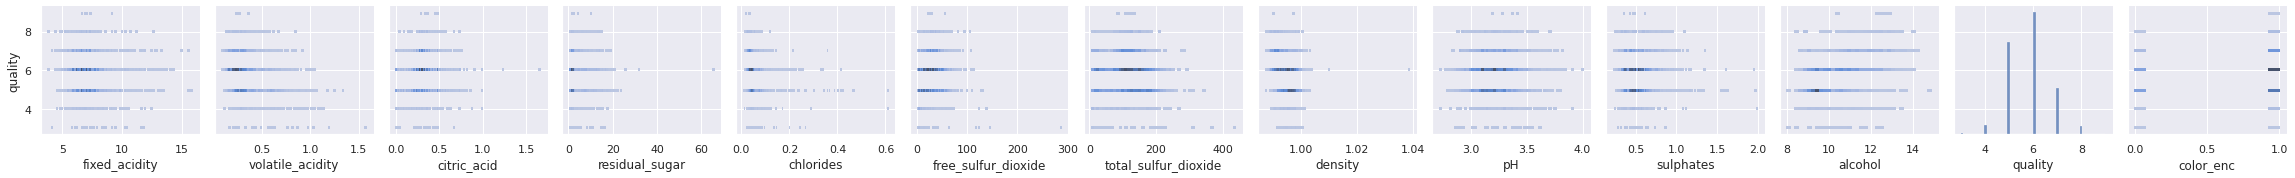

In [ ]:
# pair plot 
sns.pairplot(df, y_vars=['quality'], kind="hist")

This is a histogram pairplot of quality vs each individual property. The chemical property is on the x-axis, while the quality is on the y-axis. This histogram pairplot shows the count of a particular rank at a particular value of the property. For example for fixed acidity, there are a of quality=6 wines in the range of 5 to 10 for fixed acidity vs, the range of 10 to 15. As the wine quality increases, more the lower range of the fixed acidity has more points than the upper range.

Next, plot a heatmap to visualize features are correlated with each other.

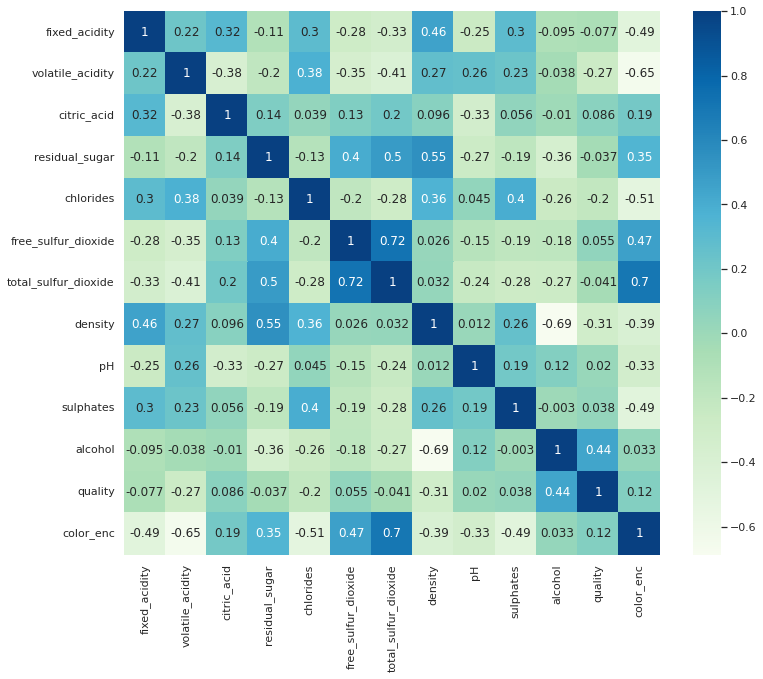

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

The Heat map shows the correlation between each of the properties. The highest correlation seems to be between total sulfur dioxide and the color. This could mean that a particular color of wine has more total sulfur dioxide than the other color. 
For determining, which factor affects the quality the most, the highest correlation seems to be between quality and alcohol content.

# Model Fitting

## Method
For each of type of modeling method:

1. **Evaluate Models** Build a model and fit/train it to the train data
1. **Make Predictions** Make predictions on the test data
1. **Plot the Accuracy** Print and plot the accuracy against the provided data
1. **Analyze** Analyze and make conclusion about the fit and accuracy of the model.

First, separate the data into features (X) and labels (y). 
Then split the data into the training and test sets using the train_test_split function. The proportions are 20% test data and 80% training data.
Printing the shapes of the new dataframes, shows the expected split.

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (5197, 12)
y_train (5197,)
X_test (1300, 12)
y_test (1300,)


## Linear Regression and Simple Linear Regression

Linear regression is the modeling of a relationship between a  response variable and one or more explanatory variables. 

### Fitting the Data
First, create a Linear Regression model and fit the training data to it. Calculate the R-squared (score) value.

In [ ]:
ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)
ln_reg.score(X_train, y_train)

0.2924836920165753

The R-squared is quite small, so delving further to see if the R-squared can be improved by removing certain features.

The first linear regression model will have all of the features included.

In [ ]:
lin_reg_all = smf.ols(formula="quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", data = df)
lin_reg_all = lin_reg_all.fit()
print(lin_reg_all.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:09:25   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

Based on the summary above, the p-values for citric acid and chlorides are large compared to the significance value of 0.05 so those features must be removed to see if its possible to get a better fit. 

In [ ]:
lin_reg = smf.ols(formula="quality ~ fixed_acidity + volatile_acidity + residual_sugar + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol", data = df)
lin_reg = lin_reg.fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:09:25   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409 

The R-squared is a midge better but not much improved. 
The next step will involve finding out now what the best predictor is using rankings for all of the predictors based on their adjusted R-squared values.

In [ ]:
predictors_r2_adj = {}
predictors = list(X_train)
for each in predictors:
    x = X_train[each]
    x_new = sm.add_constant(x)
    mod_res = (sm.OLS(y_train, x_new)).fit()
    predictors_r2_adj[each] = mod_res.rsquared_adj
    
ranked_predictors = dict(sorted(predictors_r2_adj.items(), key=lambda item: item[1], reverse=True))
print(ranked_predictors)

top_three = [k for i, k in enumerate(ranked_predictors)][:3]
print(top_three)

{'alcohol': 0.19394055205327654, 'density': 0.09186822294024699, 'volatile_acidity': 0.0666694389951139, 'chlorides': 0.03664241190304374, 'color_enc': 0.012288148590968606, 'citric_acid': 0.006255116245831638, 'fixed_acidity': 0.0045671852165724, 'total_sulfur_dioxide': 0.002740048624819247, 'free_sulfur_dioxide': 0.0021366701018894485, 'residual_sugar': 0.001272145193099261, 'sulphates': 0.0010381364196176968, 'pH': 0.00014641127227787987}
['alcohol', 'density', 'volatile_acidity']


So the top predictor is "alcohol". That is the feature that will be used for simple linear regression
#### Simple Linear Regression
In Linear Regression, the case of one explanatory variable is Simple Linear Regression. 

R-squared Value for Alcohol:0.19741894722179176


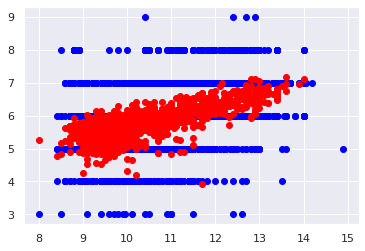

In [ ]:
lin_reg_alcohol = smf.ols(formula="quality ~ alcohol", data = df)
lin_reg_alcohol = lin_reg_alcohol.fit()
print("R-squared Value for Alcohol:{}".format(lin_reg_alcohol.rsquared))

x =  np.array(X_train.alcohol).reshape(-1,1)
y =  np.array(y_train).reshape(-1,1)
x_test = np.array(X_test.alcohol).reshape(-1,1)
plt.scatter(x, y, color = 'blue')
plt.scatter(x_test, ln_reg.predict(X_test), color = 'red')

When plotting quality vs alcohol, there is no clear correlation. An increase in alcohol content does not necessarily imply a linear increase in quality.

### Plotting the Accuracy

Lets see how our predictions line up with our true labels.

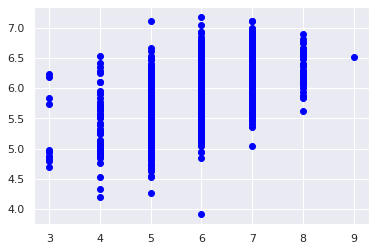

In [ ]:
y_pred = np.array(ln_reg.predict(X_test)).reshape(-1,1)
plt.scatter(y_test, y_pred, color="blue")

Too many predicted values guess around the same value, so these aren't lining up well.

### Linear Regression Conclusion

The full Linear Regression gave us a very low R-squared. When certain low p-valued features were removed, the r-squared value did not improve. Even when using Simple Linear Regression, the r-squared value did not improve much. In fact the R-squared value for simple linear regression is worse. When plotting the prediction. The prediction values are concentrated in the center while the the actual data is much more spread out. 

When plotting the accuracy, there is no straight linear regression line that would fit. So this is not a very good model for modeling this dataset. 

## Polynomial Regression
Polynomial Regression is the modeling of a relationship between the the response variable and the explanatory variables modelled as nth degree polynomial.

### Fitting the Data
Sometimes a particular explanatory variable has a polynomial distribution instead of a linear one. Using the best predictor found above ("alcohol"), we fit a polynomial regression for degrees 2 and 3.  

In [ ]:
# Degree = 2 
poly2 = PolynomialFeatures(degree = 2)
x_poly2 = poly2.fit_transform(x)
  
poly2.fit(x_poly2, y)
lin2 = LinearRegression()
lin2.fit(x_poly2, y)
print(lin2.score(x_poly2, y))

# Degree = 3
poly3 = PolynomialFeatures(degree = 3)
x_poly3 = poly3.fit_transform(x)
  
poly3.fit(x_poly3, y)
lin3 = LinearRegression()
lin3.fit(x_poly3, y)
print(lin3.score(x_poly3, y))


0.19655417687667742
0.20583239425722877


The R-squared value is only very slightly better with 3 than with 2.

### Plotting the Accuracy
Plotting results and shows us how accurate our predictions seem. 

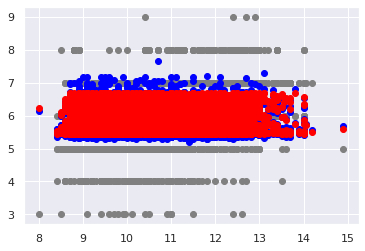

In [ ]:
# Plot for Degree = 2
flat_list_x = [item for sublist in x for item in sublist]
x_new = list(flat_list_x)

yy = lin2.predict(poly2.fit_transform(x))
flat_list_y = [item for sublist in yy for item in sublist]
y_new = sorted(list(flat_list_y))

plt.scatter(x, y, color='gray')
plt.scatter(x_new, y_new, color='blue')

# Plot for Degree = 3
flat_list_x = [item for sublist in x for item in sublist]
x_new = list(flat_list_x)

yy = lin3.predict(poly3.fit_transform(x))
flat_list_y = [item for sublist in yy for item in sublist]
y_new = sorted(list(flat_list_y))

plt.scatter(x_new, y_new, color='red')

As the degrees increase, the regression centers itself closer and closer.  The blues (degree 2) are further away from each other than the reds (degree 3).

Is there a degree that is optimal for this feature? Ranking alcohol to quality for a degree = ranging from 1 to 20. 

In [ ]:
degree_r2 = {}
ols_query = "quality ~"
for i in range(1,21):
    ols_query += f" + I(alcohol**{i})"
    result_poly = smf.ols(ols_query, data=df).fit()
    degree_r2[i] = result_poly.rsquared

ranked_predictors = dict(sorted(degree_r2.items(), key=lambda item: item[1], reverse=True))
print(ranked_predictors)

top_three = [k for i, k in enumerate(ranked_predictors)][:3]
print(top_three)



{7: 0.21226492445388956, 8: 0.2116353139059276, 9: 0.21087365225371613, 17: 0.21056019047311614, 18: 0.2104351769128472, 16: 0.21027040312540013, 10: 0.21012168881775095, 6: 0.21011921045549098, 15: 0.2098240000284095, 19: 0.20953190991139892, 11: 0.2095288354803666, 14: 0.2094110527875077, 12: 0.20920012812019528, 13: 0.20917219130234077, 5: 0.2080759767847079, 4: 0.20801986967033248, 3: 0.2077416021216677, 20: 0.20732495718155186, 2: 0.19940898382643157, 1: 0.19741894722179176}
[7, 8, 9]


N = 7 seems to have the highest R-squared value. 

### Polynomial Regression Conclusion
Polynomial Regression seems to predict in a tighter range than the true range of the data.  It doesn't seem to improve as we increase the degree by much. Overall, the polynomial regression on the feature alcohol does not give a very strong accuracy score. Therefore, even the Polynomial Regression is not a very good model. 

## Multi-Linear Regression

Multi-Linear Regression is a the modeling of a linear relationship between a response variable and multiple explanatory variables. 

### Fit the Data 

As a simple linear model is not a very good model for this data, it is good to explore if multiple features will fit better. So it is necessary to calculate the optimum number of features to consider when fitting the data.

In [ ]:

RFE_regressor = LinearRegression()
# Initializing RFE model
rfe = RFE(RFE_regressor) # random number(2)
# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train, y_train)  
# Fitting the data to model
RFE_regressor.fit(X_train,y_train)
nof_list=np.arange(1,15)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.308698


The most optimum number of features is 12, i.e. all of them.

### Plotting the Accuracy
Plotting the accuracy shows the above. 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


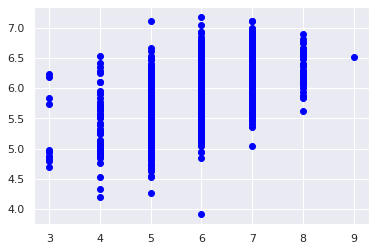

In [ ]:
x_test_rfe = rfe.transform(X_test)
y_pred = rfe.predict(x_test_rfe)
plt.scatter(y_test, y_pred, color="blue")

### Multilinear Regression Conclusion
Even when optimized for a good feature set, i.e. all of them, this is not a very accurate predictor of wine quality. The R-squared does not exceed 0.30. Because the optimized feature set is very large, it is very difficult to do interaction terms with all of the variables. But overall, the Multi-Linear Regression does not seem like a very good model for this dataset. 

## Logistic Regression
Logistic regression uses a logistic function to model a relationship of conditional probability among variables.

### Fitting the Data
Lets fit the data to a liblinear solver LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.5230769230769231

The calculated score of this model is 0.52.

### Plotting the Accuracy
Visualize the accuracy by plotting the predicted values vs true test values on the same graph. First, calculate the predictions array.

In [ ]:
y_pred = log_reg.predict(X_test)

Then, plot the confusion matrix of these predictions and the test true values as a heatmap

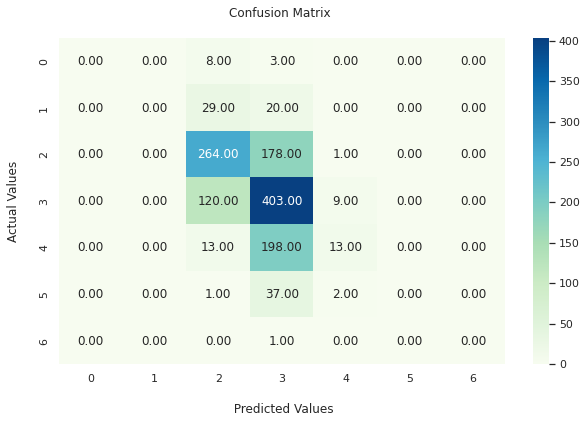

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

Here's an example on how to read the heatmap: Consider if the predicted value was "4".  Looking at the column for `Predicted Value = 4`, observe that the actual value could be 5 (2 instances), 4 (13 instances), 3 (9 instances), and 2 (1 instance).

Finally, consider the classification report to see how the model did in fitting the data.

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.71      0.10      0.18        49
           5       0.87      0.38      0.53       443
           6       0.50      0.95      0.65       532
           7       0.93      0.33      0.49       224
           8       1.00      0.38      0.55        40
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.57      0.30      0.34      1300
weighted avg       0.72      0.59      0.55      1300



### Logistic Regression Conclusion

Logistic Regression is still not very accurate, but compared to the Linear and Polynomial Regressions it is much better. 

## Ensemble Learning (AdaBoost)
AdaBoost chains several classifiers and allows each to weight the training of the next such that predictions grow more precise with each link.

### Fitting the Data
First, lets fit the model to the training data.

In [ ]:
for d in range(1, 12):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=d), random_state=45)
    clf.fit(X_train, y_train)
    print(f"Score at depth {d} is {clf.score(X_test, y_test)}")

Score at depth 1 is 0.3484615384615385
Score at depth 2 is 0.34307692307692306
Score at depth 3 is 0.34384615384615386
Score at depth 4 is 0.4146153846153846
Score at depth 5 is 0.46153846153846156
Score at depth 6 is 0.5192307692307693
Score at depth 7 is 0.5692307692307692
Score at depth 8 is 0.6346153846153846
Score at depth 9 is 0.6576923076923077
Score at depth 10 is 0.666923076923077
Score at depth 11 is 0.6638461538461539


At depth 10, the score is 0.666923076923077.

### Plotting the Accuracy
Next is to visualize the difference.  First, plot the confusion matrix on a heatmap.

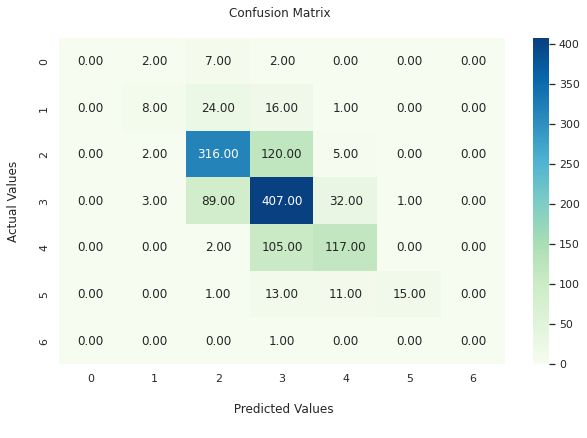

In [ ]:
y_pred = clf.predict(X_test)

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In this case, if the predicted value was "4" the actual value could be 5 (11 instances), 4 (117 instances), 3 (32 instances), 2 (5 instance), and 1 (1 instance).

Additionally, this is the classification report which sheds light on the accuracy of making specific classifications/predictions.

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.53      0.16      0.25        49
           5       0.72      0.71      0.72       443
           6       0.61      0.77      0.68       532
           7       0.70      0.52      0.60       224
           8       0.94      0.38      0.54        40
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.50      0.36      0.40      1300
weighted avg       0.67      0.66      0.65      1300



### Ensemble Learning (AdaBoost) Conclusion

The ensemble is more accurate than all the previous models we've tried so far.  

## Support Vector Machine
Support Vector Machine, or SVM is a linear model for classification and regression problems. The algorithm uses hyperplanes to separate the data into classes.

### Fit the Data
Build the model and fit it to the training data.  Then, calculate the model score.

In [ ]:
clf = svm.SVC(C=3, gamma=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5876923076923077

The score is 0.5876923076923077

### Plotting the Accuracy
Visualize the prediction accuracy of the SVM by plotting it's confusion_matrix on a heat map


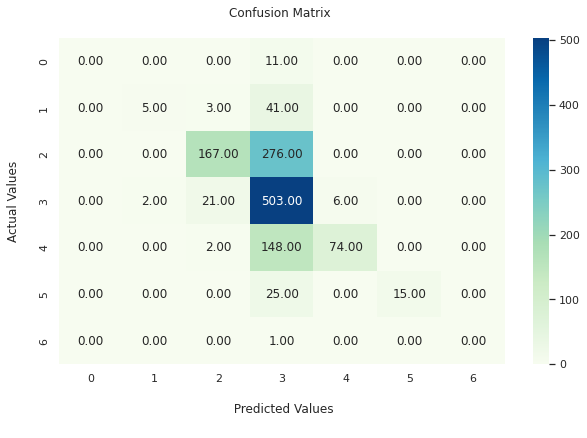

In [ ]:
y_pred = clf.predict(X_test)

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In this case, if the predicted value was "4" the actual value could be 4 (74 instances), or 3 (6 instances).

Next, observe the classification report of the SVM

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.71      0.10      0.18        49
           5       0.87      0.38      0.53       443
           6       0.50      0.95      0.65       532
           7       0.93      0.33      0.49       224
           8       1.00      0.38      0.55        40
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.57      0.30      0.34      1300
weighted avg       0.72      0.59      0.55      1300



### SVM Conclusion
SVM was a good fit for the data.  As we increased the C to 3 we saw a better score.  Also, we saw a better score when we set the gamma to 1 as compared to other values. 

# Conclusion

The most accurate model to predict wine quality is the SVM.  The SVM managed to be more precise for most values, it also had high recall amounts for a specific value(6).  Even while the AdaBoost had a higher score, the SVM's precision is very impressive, as can be observed when comparing the heatmaps of AdaBoost vs SVM.

When predicting wine quality, i.e. as an app on a phone, a slightly lower score for more precision and much less recall is a good tradeoff.  Although the algorithm incorrectly guesses 6 often, the other quality values have good precision and low or equivalent recall as compared to AdaBoost.

As a note, when SVM guesses 6, a further prediction run on an alternative model would be merited in order to balance the high recall and make for an accurate and reliable prediction overall.
